In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = '/home/faizi/Downloads/Compressed/CSRNet-pytorch-master/ShanghaiTech/'

In [4]:
#now generate the ShanghaiA's ground truth
#part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
#part_B_train = os.path.join(root,'part_B/train_data','images')
#part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
model = CSRNet()

In [7]:
model = model.cuda()

In [8]:
checkpoint = torch.load('model_best.pth.tar')

In [9]:
model.load_state_dict(checkpoint['state_dict'])

In [12]:
mae = 0
mse = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    gt_count = output.detach().cpu().sum().numpy()
    et_count = np.sum(groundtruth)
    mse += ((gt_count-et_count)*(gt_count-et_count))
    #print(i,mae)
print("MAE: ", mae/len(img_paths))
print("MSE: ", np.sqrt(mse/len(img_paths)))

MAE:  75.69745107797476
MSE:  112.33356159059642


In [10]:
from torchvision import transforms
import matplotlib.pyplot as plt

loader = transforms.Compose([
    transforms.ToTensor()])  

unloader = transforms.ToPILImage()

def imshow(img_A, tensor, title=None):
    
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)  # remove the fake batch dimension
    img_B = unloader(image)
    fig, ax = plt.subplots(1,2, figsize=(30, 30))
    ax[0].imshow(img_A);
    ax[1].imshow(img_B);
    #plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

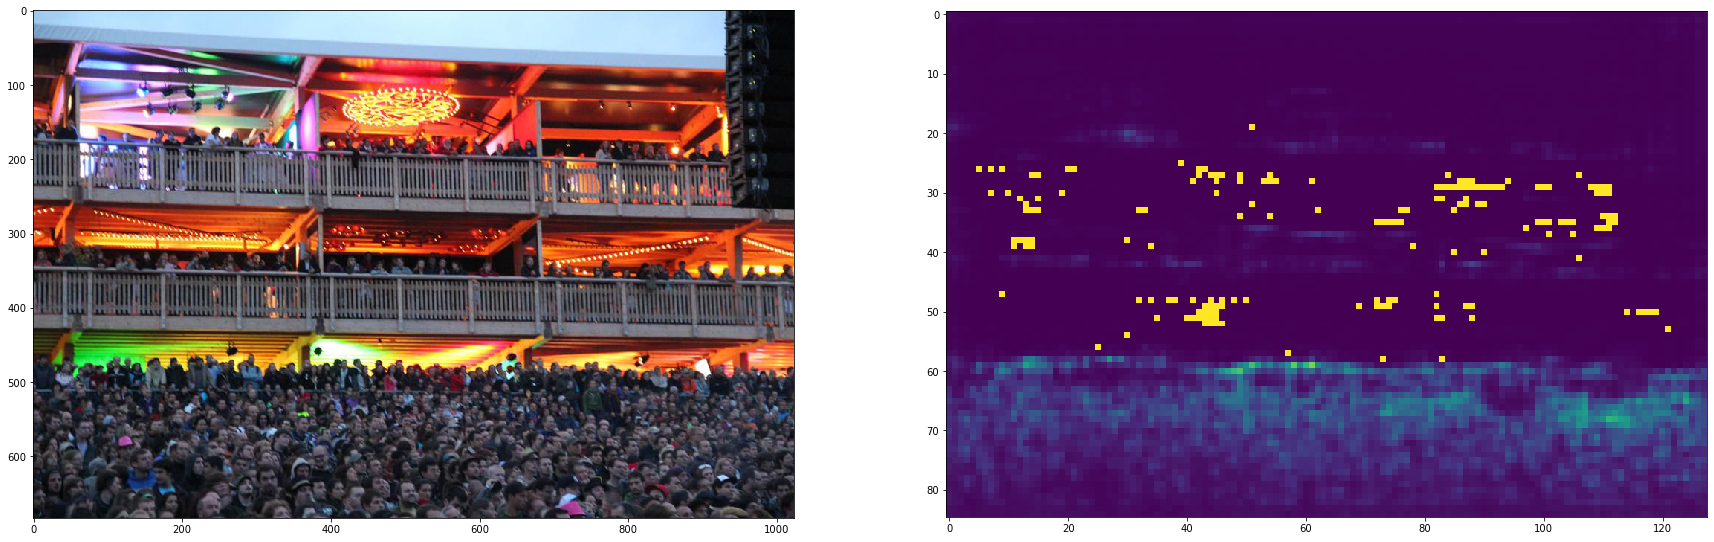

In [11]:
p = '/home/faizi/Downloads/Compressed/CSRNet-pytorch-master/ShanghaiTech/part_A/test_data/images/IMG_111.jpg'
im = Image.open(p).convert('RGB')
img = 255.0 * F.to_tensor(im)
#im = Image.open(img_paths[100]).convert('RGB')

img = transform(im).cuda()
gt_file = h5py.File(p.replace('.jpg','.h5').replace('images','ground-truth'),'r')
groundtruth = np.asarray(gt_file['density'])
output = model(img.unsqueeze(0))

imshow(im, output)

In [13]:
len(img_paths)

182

Predicted Count :  384


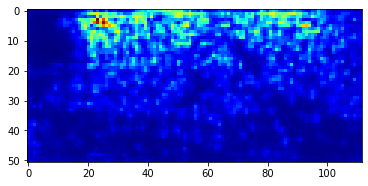

Original Count :  382


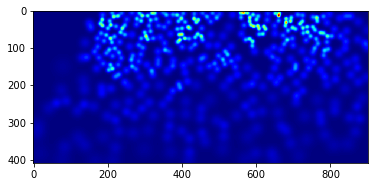

Original Image


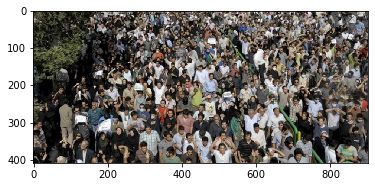

In [15]:
from matplotlib import cm as c
img = transform(Image.open('/home/faizi/Downloads/Compressed/CSRNet-pytorch-master/ShanghaiTech/part_A/test_data/images/IMG_100.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('/home/faizi/Downloads/Compressed/CSRNet-pytorch-master/ShanghaiTech/part_A/test_data/ground-truth/IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/home/faizi/Downloads/Compressed/CSRNet-pytorch-master/ShanghaiTech/part_A/test_data/images/IMG_100.jpg'))
plt.show()